**Credit Scoring Model**

In [ ]:
# Import Some Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Import dataset
df=pd.read_csv('/content/bankloans.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


*Exploratory Data Analysis (EDA)*


In [ ]:
df.describe

<bound method NDFrame.describe of       age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0      41   3      17       12     176      9.3  11.359392  5.008608      1.0
1      27   1      10        6      31     17.3   1.362202  4.000798      0.0
2      40   1      15       14      55      5.5   0.856075  2.168925      0.0
3      41   1      15       14     120      2.9   2.658720  0.821280      0.0
4      24   2       2        0      28     17.3   1.787436  3.056564      1.0
...   ...  ..     ...      ...     ...      ...        ...       ...      ...
1145   34   1      12       15      32      2.7   0.239328  0.624672      NaN
1146   32   2      12       11     116      5.7   4.026708  2.585292      NaN
1147   48   1      13       11      38     10.8   0.722304  3.381696      NaN
1148   35   2       1       11      24      7.8   0.417456  1.454544      NaN
1149   37   1      20       13      41     12.9   0.899130  4.389870      NaN

[1150 rows x 9 columns]>

In [ ]:
df.shape

(1150, 9)

In [ ]:
df.isnull().sum()

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,450


In [ ]:
df=df.dropna()
df.drop_duplicates(inplace=True)

/tmp/ipython-input-21-161449745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [ ]:
df.shape

(700, 9)

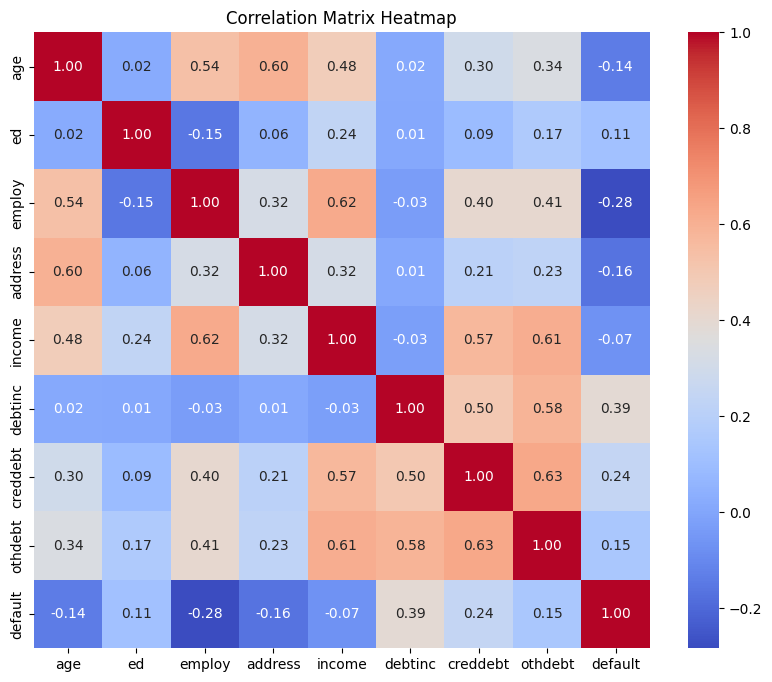

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
df.corr()['default']

,default
age,-0.137657
ed,0.114676
employ,-0.282978
address,-0.164451
income,-0.070970
debtinc,0.389575
creddebt,0.244740
othdebt,0.145713
default,1.000000


In [ ]:
X=df.drop(['default'], axis=1)
y=df['default']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

*Split Data*

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

*Train the Model*

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

*Evaluate the Model*

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
)

print("Accuracy :", round(accuracy_score(y_test, y_pred), 2))
print("Precision :", round(precision_score(y_test, y_pred), 2))
print("Recall :", round(recall_score(y_test, y_pred), 2))
print("F1 Score :", round(f1_score(y_test, y_pred), 2))
print("ROC-AUC :", round(roc_auc_score(y_test, y_prob), 2))



Accuracy : 0.86
Precision : 0.85
Recall : 0.58
F1 Score : 0.69
ROC-AUC : 0.91


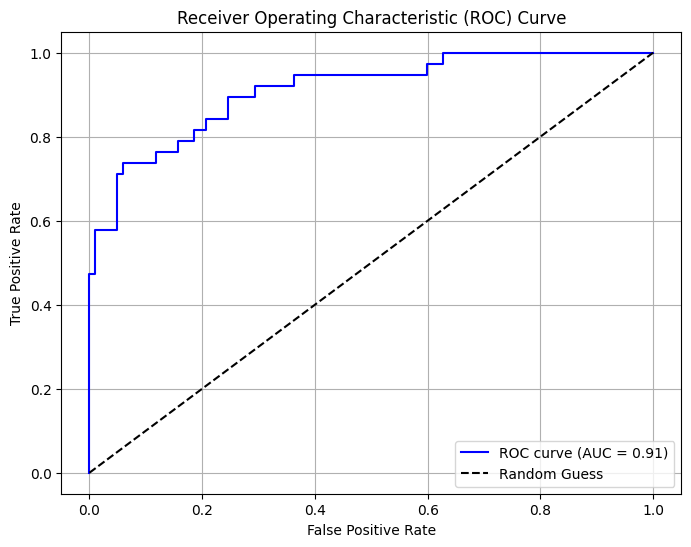

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

*Tune Hyperparameters*

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # use ['l1', 'l2'] for more options (solver-dependent)
    'solver': ['liblinear', 'saga']  # 'liblinear' supports l1 and l2; 'saga' supports l1, l2, elasticnet
}

# Initialize model
logreg = LogisticRegression(max_iter=1000)

# Grid search
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Results
print("✅ Best Parameters:", grid.best_params_)
print("🏆 Best CV Score  :", round(grid.best_score_, 4))

# Best model
best_logreg = grid.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
✅ Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
🏆 Best CV Score  : 0.8018


*Test Model*

In [ ]:
y_pred = best_logreg.predict(X_test)
print("Accuracy :", round(accuracy_score(y_test, y_pred), 2))
print("Precision :", round(precision_score(y_test, y_pred), 2))
print("Recall :", round(recall_score(y_test, y_pred), 2))
print("F1 Score :", round(f1_score(y_test, y_pred), 2))
print("ROC-AUC :", round(roc_auc_score(y_test, y_prob), 2))


Accuracy : 0.86
Precision : 0.85
Recall : 0.58
F1 Score : 0.69
ROC-AUC : 0.91


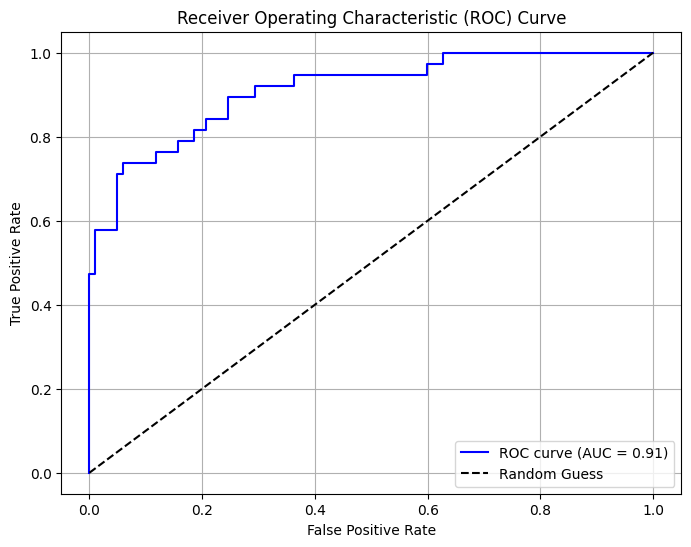

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()